In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Importing the dataset

In [2]:
leads_data = pd.read_csv('Leads.csv')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 01. General Overview of Dataset

In [3]:
# shape of the dataset
leads_data.shape

(9240, 37)

In [4]:
# checking the columns of the dataset
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# checking the general overview of the dataset
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# checking for the null values
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# leads_data.dtypes
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## 02. Data Cleaning

In [8]:
# Converting binary variables to 0 and 1
list_to_convert = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']
def convertToNumber(x):
    return x.map({'Yes':1, 'No':0})

# applying the function to data set and change the vlaue
leads_data[list_to_convert] = leads_data[list_to_convert].apply(convertToNumber)

In [9]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [10]:
# Convert Select to null values
leads_data['Specialization'] = leads_data['Specialization'].apply(lambda x: np.nan if x=='Select' else x)
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].apply(lambda x: np.nan if x=='Select' else x)
leads_data['Lead Profile'] = leads_data['Lead Profile'].apply(lambda x: np.nan if x=='Select' else x)
leads_data['City'] = leads_data['City'].apply(lambda x: np.nan if x=='Select' else x)

In [11]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [12]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Dropping unwanted columns sincethey are enetered by sales team

In [13]:
leads_data.drop(['Lead Profile','Lead Quality','Tags','Prospect ID','Lead Number'],axis=1,inplace=True)

In [14]:
100*leads_data.isnull().sum()/len(leads_data)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

Dropping columns having high null values

In [15]:
leads_data.drop(['How did you hear about X Education','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [16]:
100*leads_data.isnull().sum()/len(leads_data)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [17]:
round(leads_data.Country.value_counts(normalize=True),2)

India                   0.96
United States           0.01
United Arab Emirates    0.01
Singapore               0.00
Saudi Arabia            0.00
United Kingdom          0.00
Australia               0.00
Qatar                   0.00
Bahrain                 0.00
Hong Kong               0.00
France                  0.00
Oman                    0.00
unknown                 0.00
Germany                 0.00
Nigeria                 0.00
Canada                  0.00
South Africa            0.00
Kuwait                  0.00
Sweden                  0.00
Philippines             0.00
China                   0.00
Belgium                 0.00
Uganda                  0.00
Netherlands             0.00
Bangladesh              0.00
Ghana                   0.00
Italy                   0.00
Asia/Pacific Region     0.00
Tanzania                0.00
Sri Lanka               0.00
Russia                  0.00
Malaysia                0.00
Liberia                 0.00
Denmark                 0.00
Switzerland   

Dropping country since it is highly skewed

In [18]:
leads_data.drop('Country',axis=1,inplace=True)

In [19]:
100*leads_data.isnull().sum()/len(leads_data)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [20]:
leads_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

Dropping 'What matters most to you in choosing a course' since it is highly skewed

In [21]:
leads_data.drop('What matters most to you in choosing a course',inplace=True,axis=1)

In [22]:
100*leads_data.isnull().sum()/len(leads_data)

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                              36.580087
What is your current occupation             29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About O

In [23]:
leads_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [24]:
## Dropping rows with missing occupation
leads_data = leads_data[pd.isnull(leads_data['What is your current occupation'])==False]

Binning less data occupations into another category


In [25]:
leads_data['What is your current occupation']=leads_data['What is your current occupation'].apply(lambda x: 'other_occupations' if x in ['Student','Other','Housewife','Businessman'] else x)

In [26]:
100*leads_data.isnull().sum()/len(leads_data)

Lead Origin                                  0.000000
Lead Source                                  0.549618
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.984733
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.984733
Last Activity                                1.572519
Specialization                              29.725191
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About O

In [27]:
leads_data.shape

(6550, 25)

Filling the Null values of Specialization

In [28]:
null_places = leads_data.Specialization.isnull().sum()
Specs = leads_data[['Specialization','Lead Origin']].groupby('Specialization').count()
Specs = Specs.reset_index()
Specs['Perc'] = Specs['Lead Origin']*100/len(leads_data)
Specs['Num'] = Specs['Perc']*null_places//100
for Special in Specs.Specialization:
    n = Specs[Specs.Specialization==Special].Num.sum()
    leads_data['Specialization']=leads_data['Specialization'].replace(to_replace=np.NaN,value=Special,limit=n)
leads_data['Specialization'].isnull().sum()

0

In [29]:
100*leads_data.isnull().sum()/len(leads_data)

Lead Origin                                  0.000000
Lead Source                                  0.549618
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.984733
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.984733
Last Activity                                1.572519
Specialization                               0.000000
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About O

Filling nulls of City with Mode

In [30]:
leads_data.City = leads_data.City.fillna('Mumbai')

In [31]:
leads_data['City'] = leads_data['City'].apply(lambda x: 'Other_Cities' if ((x != 'Mumbai')) else x)
leads_data['City'].value_counts(normalize=True)

Mumbai          0.723359
Other_Cities    0.276641
Name: City, dtype: float64

In [32]:
100*leads_data.isnull().sum()/len(leads_data)

Lead Origin                                 0.000000
Lead Source                                 0.549618
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.984733
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.984733
Last Activity                               1.572519
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

Removing the rows with TotalVisits as null

In [33]:
leads_data = leads_data[~np.isnan(leads_data['TotalVisits'])]

In [34]:
100*leads_data.isnull().sum()/len(leads_data)

Lead Origin                                 0.000000
Lead Source                                 0.451713
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.000000
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.000000
Last Activity                               0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

Removing the rows with Lead Source as Null

In [35]:
leads_data = leads_data[pd.isnull(leads_data['Lead Source'])==False]

In [36]:
100*leads_data.isnull().sum()/len(leads_data)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

Binning the less data of 'Last Activity'

In [37]:
leads_data['Last Activity'].value_counts(normalize=True)

Email Opened                    0.384134
SMS Sent                        0.342669
Page Visited on Website         0.067126
Olark Chat Conversation         0.066969
Converted to Lead               0.046315
Email Bounced                   0.028634
Email Link Clicked              0.027852
Form Submitted on Website       0.012831
Unreachable                     0.011109
Unsubscribed                    0.006415
Had a Phone Conversation        0.003599
View in browser link Clicked    0.000782
Approached upfront              0.000782
Email Received                  0.000313
Email Marked Spam               0.000313
Visited Booth in Tradeshow      0.000156
Name: Last Activity, dtype: float64

In [38]:
leads_data['Last Activity'] = leads_data['Last Activity'].apply(lambda x: 'Other_Activity' if ((x != 'Email Opened') and (x!='SMS Sent')) else x)

Dropping last notable activity since it is similar to last activity

In [39]:
leads_data.drop('Last Notable Activity',axis=1,inplace=True)

## 03. EDA

In [40]:
leads_data['Lead Origin'].describe()

count                        6391
unique                          4
top       Landing Page Submission
freq                         3643
Name: Lead Origin, dtype: object

In [41]:
leads_data['Lead Origin'].value_counts()

Landing Page Submission    3643
API                        2140
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64

In [42]:
leads_data['Lead Source'].describe()

count       6391
unique        16
top       Google
freq        2048
Name: Lead Source, dtype: object

In [43]:
leads_data['Lead Source'].value_counts()

Google               2048
Direct Traffic       1891
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Live Chat               2
Social Media            2
Press_Release           1
Pay per Click Ads       1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64

In [44]:
small_data = ['Welingak Website','Referral Sites','Facebook','Click2call','bing','Live Chat','Social Media','testone','Press_Release','Pay per Click Ads','WeLearn']
leads_data['Lead Source'] = leads_data['Lead Source'].apply(lambda x: 'other sites' if x in small_data else x)

In [45]:
leads_data['Total Time Spent on Website'].describe()

count    6391.000000
mean      535.018776
std       565.084312
min         0.000000
25%        34.500000
50%       287.000000
75%      1021.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

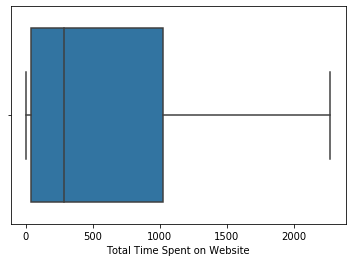

In [46]:
sns.boxplot(leads_data['Total Time Spent on Website'])

No outliers in the field 'Total Time Spent on Website'

In [47]:
leads_data['TotalVisits'].describe()

count    6391.000000
mean        3.620091
std         5.042908
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

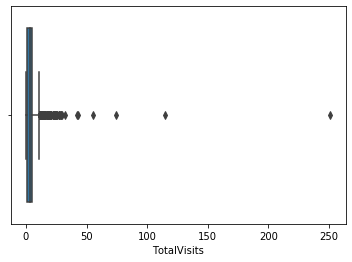

In [48]:
sns.boxplot(leads_data['TotalVisits'])

In [49]:
leads_data['TotalVisits'].quantile(0.99)

18.0

Removing Outliers

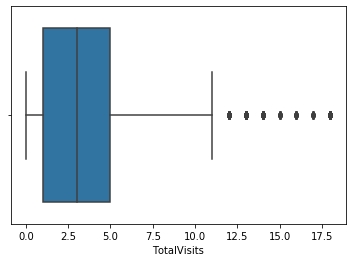

In [50]:
tolerance = leads_data['TotalVisits'].quantile(0.99)
leads_data.TotalVisits = leads_data.TotalVisits.apply(lambda x: tolerance if x>tolerance else x)
sns.boxplot(leads_data['TotalVisits'])

In [51]:
leads_data['Page Views Per Visit'].describe()

count    6391.000000
mean        2.477859
std         2.165296
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        55.000000
Name: Page Views Per Visit, dtype: float64

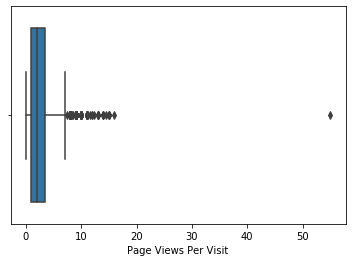

In [52]:
sns.boxplot(leads_data['Page Views Per Visit'])

In [53]:
leads_data['Page Views Per Visit'].quantile([0.95,0.96,0.97,0.98,0.99])

0.95    6.0
0.96    7.0
0.97    7.0
0.98    8.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

Removing Outliers

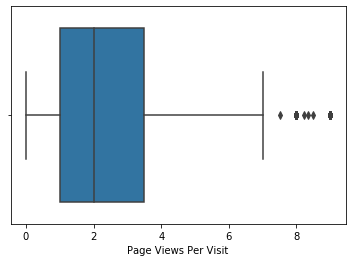

In [54]:
tolerance = leads_data['Page Views Per Visit'].quantile(0.99)
leads_data['Page Views Per Visit'] = leads_data['Page Views Per Visit'].apply(lambda x: tolerance if x>tolerance else x)
sns.boxplot(leads_data['Page Views Per Visit'])

#### Checking for Data Imbalance

In [55]:
converted_leads = leads_data[leads_data['Converted']==1]
dropped_leads = leads_data[leads_data['Converted']==0]

In [56]:
len(converted_leads),len(dropped_leads)

(3065, 3326)

Data is balanced

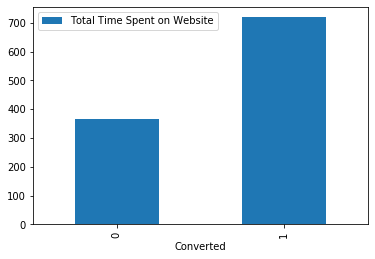

In [57]:
leads_data[['Total Time Spent on Website','Converted']].groupby('Converted').mean().plot.bar()

There is a significant difference in the time spent by the leads who have converted and who haven't

In [58]:
leads_data[['Get updates on DM Content']].describe()

,Get updates on DM Content
count,6391.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


There is no one that opted for Get updates in DM Content, hence dropping the column

In [59]:
leads_data[['Receive More Updates About Our Courses']].describe()

,Receive More Updates About Our Courses
count,6391.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


There is no one that opted for Receive More Updates About Our Courses, hence dropping the column

In [60]:
leads_data[['Update me on Supply Chain Content']].describe()

,Update me on Supply Chain Content
count,6391.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


There is no one that opted for Update me on Supply Chain Content, hence dropping the column

In [61]:
leads_data[['I agree to pay the amount through cheque']].describe()

,I agree to pay the amount through cheque
count,6391.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


There is no one that opted for I agree to pay the amount through cheque, hence dropping the column

In [62]:
leads_data.drop(['Get updates on DM Content','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                'I agree to pay the amount through cheque'],axis=1,inplace=True)

#### Analysis on the source of Traffic

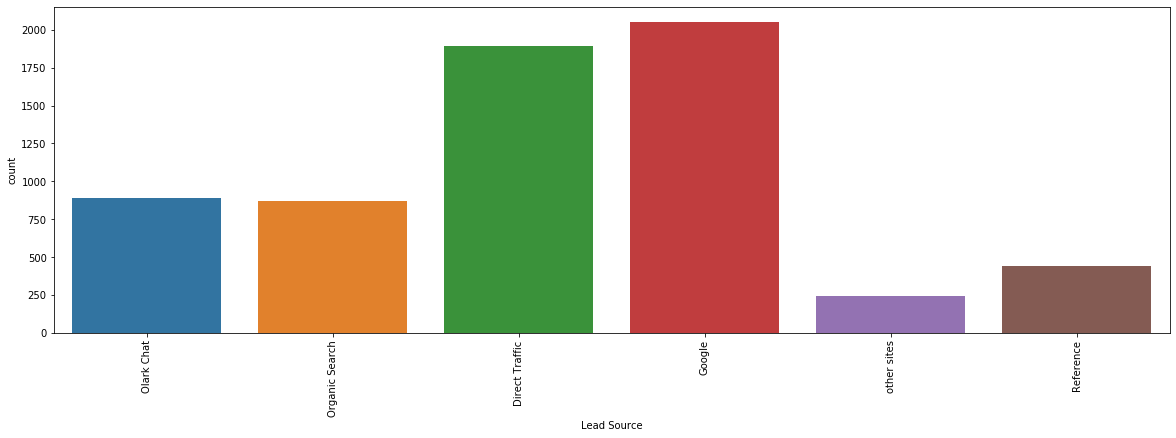

In [63]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(leads_data['Lead Source'])

- The majority of the viewers are from Google or those who are hitting the website directly
- There is also a good amount of traffic from Olark chat and Organic search

#### Analysis on the impact of 'Pages Per Visit' on Conversion Rate

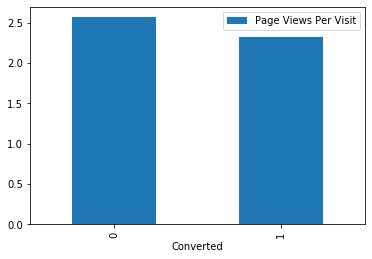

In [64]:
leads_data[['Page Views Per Visit','Converted']].groupby('Converted').mean().plot.bar()

There is no much weight of "pages per visit" on the conversion

#### Analysis on the impact of 'Last Activity' on the conversion rate

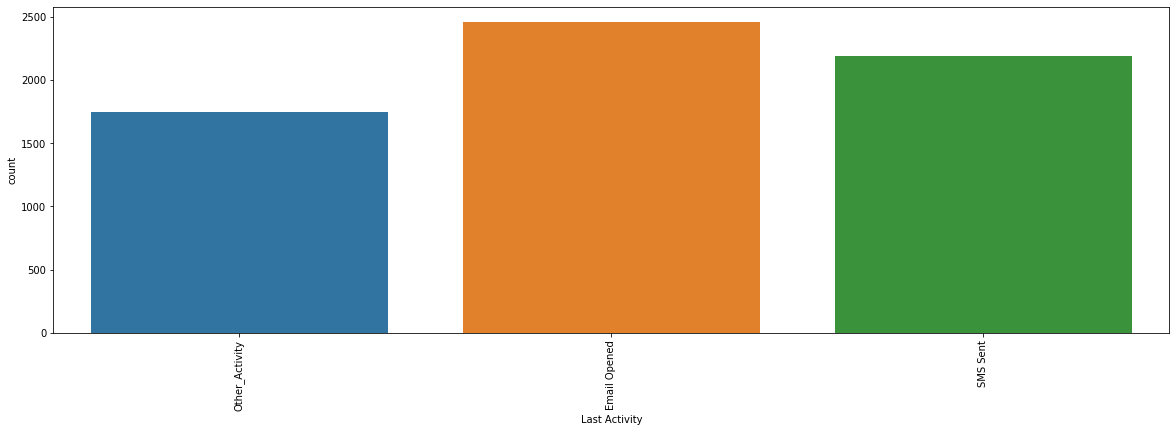

In [65]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(leads_data['Last Activity'])

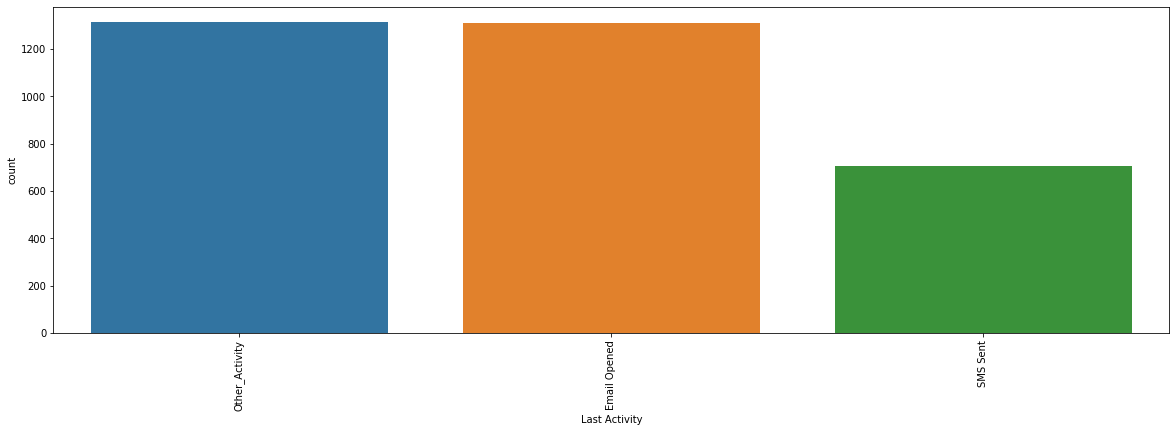

In [66]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(dropped_leads['Last Activity'])

#### How Advertisements are having an impact

In [67]:
adv_fields = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement']

In [68]:
adv_dict={}
for adv in adv_fields:
    per = round(100*leads_data[adv].sum()/len(leads_data),2)
    print(adv,end=" ")
    print(per)
    adv_dict.update({adv:per})

Search 0.16
Magazine 0.0
Newspaper Article 0.02
X Education Forums 0.0
Newspaper 0.02
Digital Advertisement 0.05


<BarContainer object of 6 artists>

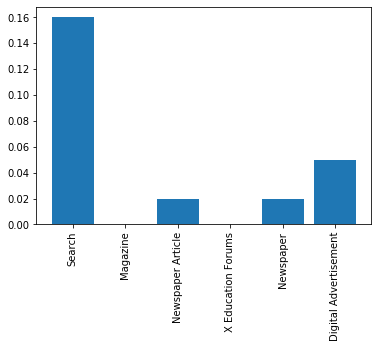

In [69]:
plt.xticks(rotation=90)
plt.bar(adv_dict.keys(),adv_dict.values())

In [70]:
leads_data.drop(adv_fields,axis=1,inplace=True)

The reach of ads is very low. Especially through Magazines abd X Education Forums

#### How the status of employment impacts

In [71]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
other_occupations        238
Name: What is your current occupation, dtype: int64

Unemployed people are visiting the website more

In [72]:
100*leads_data[leads_data['What is your current occupation']=='Unemployed']['Converted'].sum()/len(leads_data[leads_data['What is your current occupation']=='Unemployed'])

42.841490138787435

Unemployed has 43% Convertion rate

In [73]:
100*leads_data[leads_data['What is your current occupation']=='Working Professional']['Converted'].sum()/len(leads_data[leads_data['What is your current occupation']=='Working Professional'])

91.87592319054653

Working Professionals who visit the website are very less compared to Unemployed. But out of the working professionals who have visited, there is a high convertion rate

## 04. Data Preparation

In [74]:
#multicategorical_cols = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
#                        'City','Last Notable Activity']

multicategorical_cols = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
                        'City']

#### Creating Dummy variables for multi-categorical columns using One-hot encoding

In [75]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[multicategorical_cols], drop_first=True)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)

# Dropping actual columns
leads_data.drop(multicategorical_cols,axis=1,inplace=True)

In [76]:
len(leads_data.columns)

38

#### Test-Train data split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = leads_data.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Working Professional,What is your current occupation_other_occupations,City_Other_Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
#X.drop('Last Activity_Converted to Lead',axis=1,inplace=True)

In [80]:
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 05. Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Working Professional,What is your current occupation_other_occupations,City_Other_Cities
533,0,0,-0.155301,0.524169,0.291895,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
846,0,0,-1.045890,-0.941997,-1.243075,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7546,0,0,1.625879,0.554235,3.361834,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8631,0,0,0.438426,0.655045,1.315208,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7824,0,0,-0.749027,-0.613038,-0.731418,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


## 06. Model Building

In [84]:

import statsmodels.api as sm

In [85]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4435
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2047.3
Date:                Mon, 01 Jun 2020   Deviance:                       4094.7
Time:                        11:36:38   Pearson chi2:                 4.61e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1745      0.151     -7.777      0.000      -1.470      -0.878
Do Not Email                                            -1.2817      0.203     -6.310      0.000      -1.680      -0.884
Do Not Call                                             19.2389   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
TotalVisits                                              0.3345      0.054      6.166      0.000       0.228       0.441
Total Time Spent on Website                              1.1028      0.047     23.383      0.000       1.010       1.195
Page Views Per Visit                                    -0.1635      0.061     -2.664      0.008      -0.284      -0.043
Through Recommendations                                  0.9659      1.334      0.724      0.469      -1.648       3.580
A free copy of Mastering The Interview                  -0.1954      0.118     -1.649      0.099      -0.428       0.037
Lead Origin_Landing Page Submission                     -0.3809      0.137     -2.790      0.005      -0.648      -0.113
Lead Origin_Lead Add Form                                5.0104      0.686      7.302      0.000       3.666       6.355
Lead Origin_Lead Import                                  0.1461      0.661      0.221      0.825      -1.150       1.443
Lead Source_Google                                       0.3411      0.126      2.710      0.007       0.094       0.588
Lead Source_Olark Chat                                   1.5799      0.180      8.789      0.000       1.228       1.932
Lead Source_Organic Search                               0.1475      0.144      1.026      0.305      -0.134       0.429
Lead Source_Reference                                   -1.1742      0.729     -1.611      0.107      -2.603       0.254
Lead Source_other sites                                  0.4098      0.345      1.187      0.235      -0.267       1.086
Last Activity_Other_Activity                            -0.6857      0.103     -6.681      0.000      -0.887      -0.485
Last Activity_SMS Sent                                   1.0126      0.091     11.069      0.000       0.833       1.192
Specialization_Business Administration                   0.4460      0.205      2.175      0.030       0.044       0.848
Specialization_E-Business                                0.9522      0.467      2.039      0.041       0.037       1.868
Specialization_E-COMMERCE                                0.4985      0.333      1.498      0.134      -0.154       1.151
Specialization_Finance Management                        0.6148      0.157      3.914      0.000       0.307       0.923
Specialization_Healthcare Management                     0

#### RFE

In [86]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [87]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [88]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_other sites', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Specialization_E-Business',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'What is your current occupation_Working Professional'],
      dtype='object')

#### Assessing the model with statsmodel

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4457
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2088.5
Date:                Mon, 01 Jun 2020   Deviance:                       4177.1
Time:                        11:36:39   Pearson chi2:                 4.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0204      0.077    -13.249      0.000      -1.171      -0.869
Do Not Email                                            -1.2509      0.198     -6.323      0.000      -1.639      -0.863
Total Time Spent on Website                              1.1213      0.046     24.216      0.000       1.031       1.212
Through Recommendations                                  1.1710      1.398      0.837      0.402      -1.570       3.912
Lead Origin_Lead Add Form                                4.0592      0.235     17.305      0.000       3.599       4.519
Lead Source_Google                                       0.3653      0.088      4.146      0.000       0.193       0.538
Lead Source_Olark Chat                                   1.4623      0.121     12.115      0.000       1.226       1.699
Lead Source_other sites                                  0.6447      0.250      2.577      0.010       0.154       1.135
Last Activity_Other_Activity                            -0.6763      0.100     -6.778      0.000      -0.872      -0.481
Last Activity_SMS Sent                                   0.9534      0.090     10.634      0.000       0.778       1.129
Specialization_E-Business                                0.4263      0.452      0.942      0.346      -0.460       1.313
Specialization_Hospitality Management                   -0.6134      0.368     -1.668      0.095      -1.334       0.107
Specialization_Retail Management                        -0.6901      0.356     -1.937      0.053      -1.388       0.008
Specialization_Rural and Agribusiness                    0.6410      0.393      1.633      0.103      -0.129       1.411
Specialization_Services Excellence                       0.4517      0.552      0.818      0.413      -0.631       1.534
What is your current occupation_Working Professional     2.4427      0.182     13.396      0.000       2.085       2.800
========================================================================================================================
"""

In [90]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

533     0.881850
846     0.878956
7546    0.635183
8631    0.660956
7824    0.084393
4986    0.754377
5542    0.417855
1719    0.229351
4860    0.988538
8609    0.157883
dtype: float64

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

y_train_pred_final.head()

,Converted,Converted_Prob
533,1,0.881850
846,1,0.878956
7546,1,0.635183
8631,0,0.660956
7824,0,0.084393


In [92]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
533,1,0.881850,1
846,1,0.878956,1
7546,1,0.635183,1
8631,0,0.660956,1
7824,0,0.084393,0


In [93]:
from sklearn import metrics

In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1956  393]
 [ 559 1565]]


#### Confusion Matrix

- ################ Not Converted # Converted
- Not Converted #### 1956 ######### 393
- Converted ######## 559 ######### 1565

In [95]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7871674491392802


In [96]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
sensitivity = TP/(TP+FN)
sensitivity

0.7368173258003766

#### Check for the VIF values of the feature variables. 

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,1.43
3,Lead Origin_Lead Add Form,1.42
7,Last Activity_Other_Activity,1.39
4,Lead Source_Google,1.31
5,Lead Source_Olark Chat,1.28
1,Total Time Spent on Website,1.27
14,What is your current occupation_Working Profes...,1.18
6,Lead Source_other sites,1.17
0,Do Not Email,1.16
9,Specialization_E-Business,1.01


#### Re-building model

Rebuilding the model by dropping 'Specialization_Services Excellence' which is having high p-value

In [100]:

col = col.drop('Specialization_Services Excellence',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_other sites', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Specialization_E-Business',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [101]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4458
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2088.9
Date:                Mon, 01 Jun 2020   Deviance:                       4177.7
Time:                        11:36:40   Pearson chi2:                 4.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0173      0.077    -13.227      0.000      -1.168      -0.867
Do Not Email                                            -1.2428      0.197     -6.297      0.000      -1.630      -0.856
Total Time Spent on Website                              1.1209      0.046     24.211      0.000       1.030       1.212
Through Recommendations                                  1.1679      1.398      0.835      0.404      -1.572       3.908
Lead Origin_Lead Add Form                                4.0574      0.235     17.300      0.000       3.598       4.517
Lead Source_Google                                       0.3626      0.088      4.119      0.000       0.190       0.535
Lead Source_Olark Chat                                   1.4591      0.121     12.099      0.000       1.223       1.696
Lead Source_other sites                                  0.6475      0.250      2.590      0.010       0.158       1.138
Last Activity_Other_Activity                            -0.6758      0.100     -6.774      0.000      -0.871      -0.480
Last Activity_SMS Sent                                   0.9540      0.090     10.641      0.000       0.778       1.130
Specialization_E-Business                                0.4233      0.452      0.936      0.349      -0.463       1.310
Specialization_Hospitality Management                   -0.6157      0.368     -1.675      0.094      -1.336       0.105
Specialization_Retail Management                        -0.6926      0.356     -1.944      0.052      -1.391       0.006
Specialization_Rural and Agribusiness                    0.6377      0.393      1.625      0.104      -0.132       1.407
What is your current occupation_Working Professional     2.4440      0.182     13.400      0.000       2.087       2.801
========================================================================================================================
"""

In [102]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1956,  393],
       [ 559, 1565]], dtype=int64)

In [103]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7871674491392802


In [104]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
sensitivity = TP/(TP+FN)
sensitivity

0.7368173258003766

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,1.43
3,Lead Origin_Lead Add Form,1.42
7,Last Activity_Other_Activity,1.39
4,Lead Source_Google,1.31
5,Lead Source_Olark Chat,1.28
1,Total Time Spent on Website,1.27
13,What is your current occupation_Working Profes...,1.18
6,Lead Source_other sites,1.17
0,Do Not Email,1.16
9,Specialization_E-Business,1.01


#### Rebuilding the model

Rebuilding the model by dropping 'Through Recommendations' since it is having high p value

In [107]:
col = col.drop('Through Recommendations',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_other sites',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Specialization_E-Business', 'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [108]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2089.3
Date:                Mon, 01 Jun 2020   Deviance:                       4178.5
Time:                        11:36:41   Pearson chi2:                 4.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0149      0.077    -13.205      0.000      -1.165      -0.864
Do Not Email                                            -1.2436      0.197     -6.300      0.000      -1.630      -0.857
Total Time Spent on Website                              1.1208      0.046     24.218      0.000       1.030       1.212
Lead Origin_Lead Add Form                                4.0558      0.235     17.293      0.000       3.596       4.516
Lead Source_Google                                       0.3615      0.088      4.107      0.000       0.189       0.534
Lead Source_Olark Chat                                   1.4576      0.121     12.092      0.000       1.221       1.694
Lead Source_other sites                                  0.6462      0.250      2.585      0.010       0.156       1.136
Last Activity_Other_Activity                            -0.6771      0.100     -6.789      0.000      -0.873      -0.482
Last Activity_SMS Sent                                   0.9520      0.090     10.622      0.000       0.776       1.128
Specialization_E-Business                                0.4221      0.452      0.933      0.351      -0.464       1.308
Specialization_Hospitality Management                   -0.6183      0.368     -1.681      0.093      -1.339       0.103
Specialization_Retail Management                        -0.6940      0.356     -1.948      0.051      -1.392       0.004
Specialization_Rural and Agribusiness                    0.6359      0.393      1.620      0.105      -0.134       1.405
What is your current occupation_Working Professional     2.4535      0.182     13.464      0.000       2.096       2.811
========================================================================================================================
"""

In [109]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1956,  393],
       [ 559, 1565]], dtype=int64)

In [110]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7871674491392802


In [111]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
sensitivity = TP/(TP+FN)
sensitivity

0.7368173258003766

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,1.43
2,Lead Origin_Lead Add Form,1.42
6,Last Activity_Other_Activity,1.39
3,Lead Source_Google,1.31
4,Lead Source_Olark Chat,1.28
1,Total Time Spent on Website,1.27
5,Lead Source_other sites,1.17
12,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.16
8,Specialization_E-Business,1.01


#### Rebilding the model

Rebuilding the model by dropping 'Specialization_E-Business' since it is having high p-value

In [114]:
col = col.drop('Specialization_E-Business',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_other sites',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [115]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4460
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2089.7
Date:                Mon, 01 Jun 2020   Deviance:                       4179.4
Time:                        11:36:42   Pearson chi2:                 4.67e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0092      0.077    -13.178      0.000      -1.159      -0.859
Do Not Email                                            -1.2391      0.197     -6.283      0.000      -1.626      -0.853
Total Time Spent on Website                              1.1207      0.046     24.220      0.000       1.030       1.211
Lead Origin_Lead Add Form                                4.0556      0.235     17.295      0.000       3.596       4.515
Lead Source_Google                                       0.3597      0.088      4.089      0.000       0.187       0.532
Lead Source_Olark Chat                                   1.4528      0.120     12.067      0.000       1.217       1.689
Lead Source_other sites                                  0.6413      0.250      2.566      0.010       0.151       1.131
Last Activity_Other_Activity                            -0.6781      0.100     -6.801      0.000      -0.873      -0.483
Last Activity_SMS Sent                                   0.9498      0.090     10.604      0.000       0.774       1.125
Specialization_Hospitality Management                   -0.6214      0.368     -1.690      0.091      -1.342       0.099
Specialization_Retail Management                        -0.6973      0.356     -1.958      0.050      -1.396       0.001
Specialization_Rural and Agribusiness                    0.6315      0.392      1.609      0.108      -0.138       1.401
What is your current occupation_Working Professional     2.4500      0.182     13.449      0.000       2.093       2.807
========================================================================================================================
"""

In [116]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1957,  392],
       [ 559, 1565]], dtype=int64)

In [117]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7873910127431254


In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
sensitivity = TP/(TP+FN)
sensitivity

0.7368173258003766

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,1.43
2,Lead Origin_Lead Add Form,1.42
6,Last Activity_Other_Activity,1.38
3,Lead Source_Google,1.31
4,Lead Source_Olark Chat,1.28
1,Total Time Spent on Website,1.27
5,Lead Source_other sites,1.17
11,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.16
8,Specialization_Hospitality Management,1.01


#### Re-building the model

Rebuilding the model by dropping 'Specialization_Rural and Agribusiness' since it is having high p-value

In [121]:
col = col.drop('Specialization_Rural and Agribusiness',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_other sites',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [122]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4461
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2091.0
Date:                Mon, 01 Jun 2020   Deviance:                       4182.0
Time:                        11:36:43   Pearson chi2:                 4.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9977      0.076    -13.099      0.000      -1.147      -0.848
Do Not Email                                            -1.2348      0.197     -6.269      0.000      -1.621      -0.849
Total Time Spent on Website                              1.1211      0.046     24.229      0.000       1.030       1.212
Lead Origin_Lead Add Form                                4.0498      0.234     17.274      0.000       3.590       4.509
Lead Source_Google                                       0.3519      0.088      4.008      0.000       0.180       0.524
Lead Source_Olark Chat                                   1.4447      0.120     12.017      0.000       1.209       1.680
Lead Source_other sites                                  0.6318      0.250      2.530      0.011       0.142       1.121
Last Activity_Other_Activity                            -0.6765      0.100     -6.789      0.000      -0.872      -0.481
Last Activity_SMS Sent                                   0.9456      0.089     10.566      0.000       0.770       1.121
Specialization_Hospitality Management                   -0.6279      0.368     -1.708      0.088      -1.348       0.093
Specialization_Retail Management                        -0.7041      0.356     -1.977      0.048      -1.402      -0.006
What is your current occupation_Working Professional     2.4525      0.182     13.468      0.000       2.096       2.809
========================================================================================================================
"""

In [123]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1957,  392],
       [ 562, 1562]], dtype=int64)

In [124]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7867203219315896


In [125]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [126]:
sensitivity = TP/(TP+FN)
sensitivity

0.7354048964218456

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,1.43
2,Lead Origin_Lead Add Form,1.42
6,Last Activity_Other_Activity,1.38
3,Lead Source_Google,1.31
4,Lead Source_Olark Chat,1.28
1,Total Time Spent on Website,1.27
5,Lead Source_other sites,1.17
10,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.16
8,Specialization_Hospitality Management,1.01


#### Rebuilding the model

Rebuilding the model by dropping 'Specialization_Hospitality Management' since it is having high p-value

In [128]:
col = col.drop('Specialization_Hospitality Management',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_other sites',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Specialization_Retail Management',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [129]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4462
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2092.4
Date:                Mon, 01 Jun 2020   Deviance:                       4184.9
Time:                        11:36:44   Pearson chi2:                 4.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0048      0.076    -13.211      0.000      -1.154      -0.856
Do Not Email                                            -1.2359      0.197     -6.283      0.000      -1.621      -0.850
Total Time Spent on Website                              1.1197      0.046     24.220      0.000       1.029       1.210
Lead Origin_Lead Add Form                                4.0397      0.234     17.261      0.000       3.581       4.498
Lead Source_Google                                       0.3507      0.088      3.995      0.000       0.179       0.523
Lead Source_Olark Chat                                   1.4481      0.120     12.051      0.000       1.213       1.684
Lead Source_other sites                                  0.6325      0.249      2.539      0.011       0.144       1.121
Last Activity_Other_Activity                            -0.6729      0.100     -6.759      0.000      -0.868      -0.478
Last Activity_SMS Sent                                   0.9464      0.089     10.577      0.000       0.771       1.122
Specialization_Retail Management                        -0.6951      0.356     -1.953      0.051      -1.393       0.002
What is your current occupation_Working Professional     2.4342      0.181     13.414      0.000       2.079       2.790
========================================================================================================================
"""

In [130]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1958,  391],
       [ 562, 1562]], dtype=int64)

In [131]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7869438855354348


In [132]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [133]:
sensitivity = TP/(TP+FN)
sensitivity

0.7354048964218456

In [134]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,1.43
2,Lead Origin_Lead Add Form,1.42
6,Last Activity_Other_Activity,1.38
3,Lead Source_Google,1.31
4,Lead Source_Olark Chat,1.28
1,Total Time Spent on Website,1.27
5,Lead Source_other sites,1.17
9,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.16
8,Specialization_Retail Management,1.01


#### Rebuilding the model

Rebuilding the model by dropping 'Specialization_Retail Management' since it is having high p-value

In [135]:
col = col.drop('Specialization_Retail Management',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_other sites',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [136]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4463
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.4
Date:                Mon, 01 Jun 2020   Deviance:                       4188.8
Time:                        11:36:45   Pearson chi2:                 4.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0106      0.076    -13.305      0.000      -1.159      -0.862
Do Not Email                                            -1.2408      0.196     -6.316      0.000      -1.626      -0.856
Total Time Spent on Website                              1.1157      0.046     24.204      0.000       1.025       1.206
Lead Origin_Lead Add Form                                4.0358      0.234     17.264      0.000       3.578       4.494
Lead Source_Google                                       0.3501      0.088      3.990      0.000       0.178       0.522
Lead Source_Olark Chat                                   1.4507      0.120     12.075      0.000       1.215       1.686
Lead Source_other sites                                  0.6403      0.249      2.573      0.010       0.152       1.128
Last Activity_Other_Activity                            -0.6754      0.100     -6.787      0.000      -0.870      -0.480
Last Activity_SMS Sent                                   0.9414      0.089     10.533      0.000       0.766       1.117
What is your current occupation_Working Professional     2.4298      0.181     13.387      0.000       2.074       2.785
========================================================================================================================
"""

In [137]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1956,  393],
       [ 558, 1566]], dtype=int64)

In [138]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7873910127431254


In [139]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
sensitivity = TP/(TP+FN)
sensitivity

0.7372881355932204

In [141]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.42
7,Last Activity_SMS Sent,1.42
6,Last Activity_Other_Activity,1.38
3,Lead Source_Google,1.31
4,Lead Source_Olark Chat,1.28
1,Total Time Spent on Website,1.27
5,Lead Source_other sites,1.17
8,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.16


## 07. Plotting ROC Curve

In [142]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [143]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

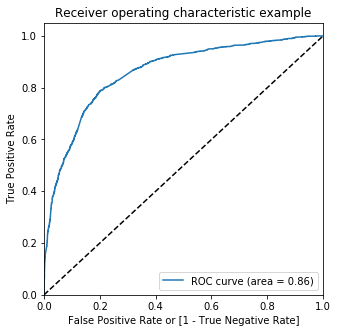

In [144]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve is 0.86 which is high. This can be considered as a good model as the trade-off between True Positive Rate (TPR) and the False positive Rate (FPR) is good.

## 08. Finding Optimum Cutoff

In [145]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
533,1,0.881209,1,1,1,1,1,1,1,1,1,1,0
846,1,0.878064,1,1,1,1,1,1,1,1,1,1,0
7546,1,0.633942,1,1,1,1,1,1,1,1,0,0,0
8631,0,0.659628,1,1,1,1,1,1,1,1,0,0,0
7824,0,0.085491,0,1,0,0,0,0,0,0,0,0,0


In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.474849  1.000000  0.000000
0.1   0.1  0.551531  0.983522  0.160920
0.2   0.2  0.676503  0.941620  0.436782
0.3   0.3  0.757433  0.891714  0.636015
0.4   0.4  0.789850  0.801318  0.779481
0.5   0.5  0.787391  0.737288  0.832695
0.6   0.6  0.762352  0.626177  0.885483
0.7   0.7  0.741113  0.545198  0.918263
0.8   0.8  0.709591  0.440207  0.953172
0.9   0.9  0.641851  0.265066  0.982546


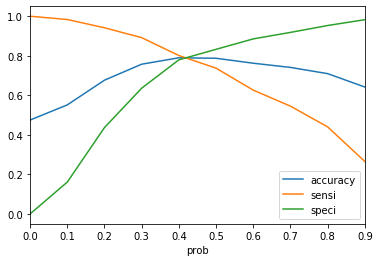

In [147]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above curve, 0.4 seems to be the optimal cutoff

0.4 is an optimal cut-off where the Sensitivity and Specificity are balanced. In our use case, since we want the sensitivity to be higher, we can reduce the cut-off to 0.35.

## 09. Differentiating Converted and Not-Converted based on new cut-off

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
533,1,0.881209,1,1,1,1,1,1,1,1,1,1,0,1
846,1,0.878064,1,1,1,1,1,1,1,1,1,1,0,1
7546,1,0.633942,1,1,1,1,1,1,1,1,0,0,0,1
8631,0,0.659628,1,1,1,1,1,1,1,1,0,0,0,1
7824,0,0.085491,0,1,0,0,0,0,0,0,0,0,0,0


In [149]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7701766152470377

In [150]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1605,  744],
       [ 284, 1840]], dtype=int64)

In [151]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [152]:
# Let's see the sensitivity of our logistic regression model
round((TP / float(TP+FN)),2)

0.87

The sensitivity of our logistic regression model in the training data set is 0.87

In [153]:
# Let us calculate specificity
TN / float(TN+FP)

0.6832694763729247

## 10. Prediction on Test data set

In [154]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_other sites,Last Activity_Other_Activity,Last Activity_SMS Sent,What is your current occupation_Working Professional
2938,0,0.998731,0,1,0,0,0,1,1
4301,1,-0.376881,0,0,1,0,1,0,0
5904,1,-0.256338,0,0,0,0,1,0,0
6881,1,-0.680012,0,0,0,0,1,0,0
5195,0,1.342634,0,1,0,0,0,1,0


In [155]:
X_test_sm = sm.add_constant(X_test)

In [156]:
y_test_pred = res.predict(X_test_sm)

In [157]:
y_test_pred[:10]

2938    0.978645
4301    0.130501
5904    0.038687
6881    0.024472
5195    0.855552
7243    0.541140
901     0.842893
3943    0.213416
4971    0.902193
1792    0.414043
dtype: float64

In [158]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [159]:
y_test_df = pd.DataFrame(y_test)

In [160]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
y_pred_final.head()

,Converted,0
2938,1,0.978645
4301,0,0.130501
5904,0,0.038687
6881,0,0.024472
5195,1,0.855552


In [162]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [163]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [164]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

0.79

In [165]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[733, 244],
       [166, 775]], dtype=int64)

In [166]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [167]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)

0.82

Sensitivity on test data is 0.82

In [168]:
y_pred_final.Converted_Prob = y_pred_final.Converted_Prob.apply(lambda x: round(100*x,2))

In [169]:
y_pred_final.columns = ['Converted','Score','final_predicted']

In [170]:
y_pred_final

,Converted,Score,final_predicted
2938,1,97.86,1
4301,0,13.05,0
5904,0,3.87,0
6881,0,2.45,0
5195,1,85.56,1
...,...,...,...
5413,1,54.70,1
7454,1,34.77,0
8201,0,60.44,1
7979,1,70.86,1


In [171]:
# Let us calculate specificity
TN / float(TN+FP)

0.7502558853633572

Let us calculate F-measure

In [172]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)

In [173]:
F_measure = (2*precision*recall)/(precision+recall)
F_measure

0.7908163265306123

## 11. Final Analysis based on model

In [174]:
res.params

const                                                  -1.010616
Do Not Email                                           -1.240774
Total Time Spent on Website                             1.115653
Lead Origin_Lead Add Form                               4.035779
Lead Source_Google                                      0.350077
Lead Source_Olark Chat                                  1.450742
Lead Source_other sites                                 0.640314
Last Activity_Other_Activity                           -0.675422
Last Activity_SMS Sent                                  0.941448
What is your current occupation_Working Professional    2.429758
dtype: float64

In [175]:
res_df = pd.DataFrame(res.params)
res_df = res_df.reset_index()
res_df.columns=['variable','coef']
res_df = res_df.sort_values(by='coef')
res_df

,variable,coef
1,Do Not Email,-1.240774
0,const,-1.010616
7,Last Activity_Other_Activity,-0.675422
4,Lead Source_Google,0.350077
6,Lead Source_other sites,0.640314
8,Last Activity_SMS Sent,0.941448
2,Total Time Spent on Website,1.115653
5,Lead Source_Olark Chat,1.450742
9,What is your current occupation_Working Profes...,2.429758
3,Lead Origin_Lead Add Form,4.035779


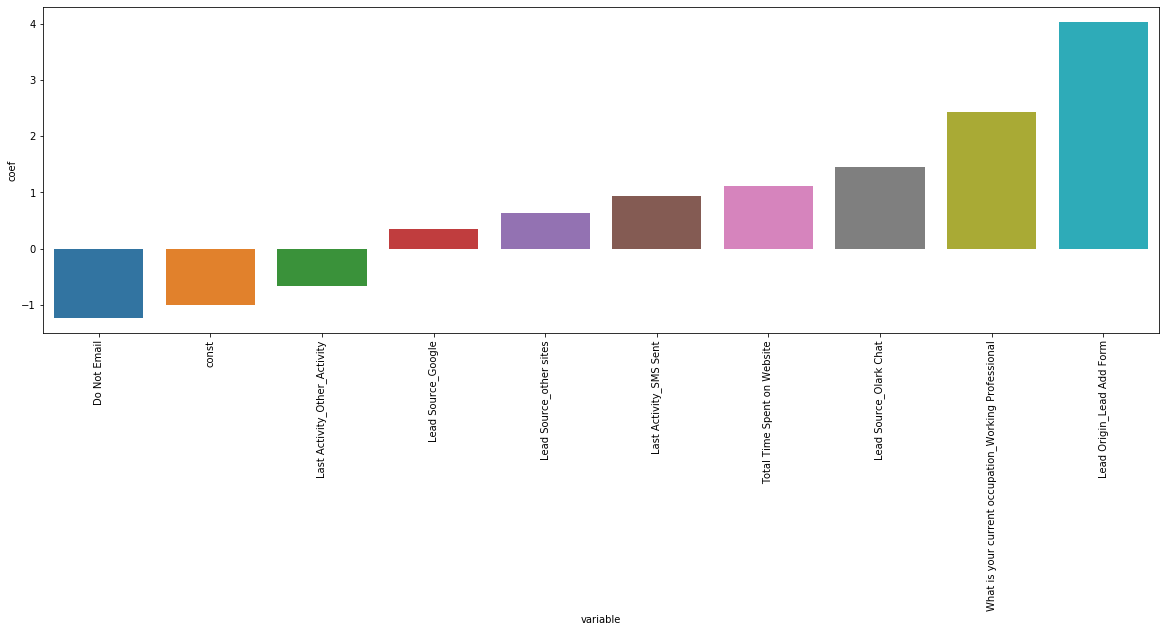

In [176]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='variable',y='coef',data=res_df)

#### Impact of 'Do not Email' on the conversion rate

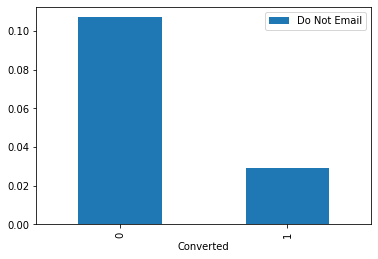

In [177]:
leads_data[['Do Not Email','Converted']].groupby('Converted').mean().plot.bar()

The people who do not to receive the emails are more tend to not buying the courses from X Education

#### Impact of 'Working Professional' on the conversion rate

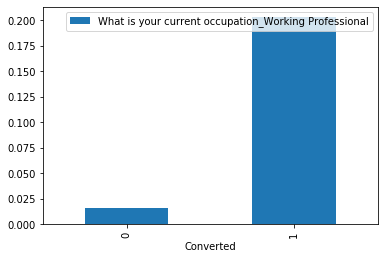

In [178]:
leads_data[['What is your current occupation_Working Professional','Converted']].groupby('Converted').mean().plot.bar()

Working professionals who visit the website are more likely to convert